# Pandas and Matplotlib Session

This session, we will cover the basics of Pandas and Matplotlib - two packages used to manipulate, analyse and visualise data. The content herein aims to act as an introduction to Pandas/Matplotlib and is by no means exhastive. Refering to the [Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html) and [Matplotlib](https://matplotlib.org/index.html) documentation is an excellent way to extend your knowledge of these two modules and find answers to edge cases.

___

Let's start by importing the modules required for the session. 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Pandas introduction

Pandas is a Python module, underpinned by Numpy, that enables efficient handling of tabular data structures, which are stored as DataFrame objects. These can either be created within a Python script or imported from separate files such as CSVs or Excel spreadsheets. 

Here, we will be working with a data set on summary protein structure determination informaiton taken from [Kaggle](https://www.kaggle.com/shahir/protein-data-set) to introduce basic Pandas commands.

We will start by importing the data set and assigning it as a DataFrame to the variable ```df```.

In [2]:
df = pd.read_csv('pdb_data_no_dups.csv')

The method ```.columns``` returns an array of column names from the DataFrame. Let's apply this to our ```df``` DataFrame.

In [3]:
df.columns

Index(['structureId', 'classification', 'experimentalTechnique',
       'macromoleculeType', 'residueCount', 'resolution',
       'structureMolecularWeight', 'crystallizationMethod',
       'crystallizationTempK', 'densityMatthews', 'densityPercentSol',
       'pdbxDetails', 'phValue', 'publicationYear'],
      dtype='object')

#### Task 1
Convert the array of columns into a list and assign it to a Python variable. 

The top five rows of of the Pandas DataFrame can be returned by using the method ```.head()```. Run ```.head()``` on your ```df``` to get a brief insight to the data.

In [4]:
df.head()    # remove code in this cell. 

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0


The method ```.index``` can give you some information on the number of entries in the DataFrame. Apply this method to your DataFrame. Is the result useful?

#### Task 2
Determine the number of rows (entries) in your ```df``` DataFrame.

In [5]:
len(df.index)    # Number of rows

141401

DataFrames are typically structured with a single Python data type assigned to each column. In other words, columns containing numeric data should not include strings (e.g. 1, 2, 3, 'four' is not good practice). What Python function is used to return the data type of the variable's below? 

In [6]:
example_string = 'am_i_a_string'
example_integer = 1234
example_float = 1.234

# Write the function used to return an object's type below


Pandas allows you to check the data type contained within a column using the method ```.dtype```. Apply this to your DataFrame. Are the results what you would expect considering your previous insight into the DataFrame?

In [7]:
df.dtypes

structureId                  object
classification               object
experimentalTechnique        object
macromoleculeType            object
residueCount                  int64
resolution                  float64
structureMolecularWeight    float64
crystallizationMethod        object
crystallizationTempK        float64
densityMatthews             float64
densityPercentSol           float64
pdbxDetails                  object
phValue                     float64
publicationYear             float64
dtype: object

Another useful feature of Pandas is the ability to find all the unique values contained within a column. Squre brackets ```[]``` are used to slice a DataFrame into a single column and the method ```.unique()``` returns non-duplicate values. Run the cell below to see what the code returns. 

In [8]:
df['experimentalTechnique'].unique()

array(['X-RAY DIFFRACTION', 'SOLUTION NMR', 'FIBER DIFFRACTION',
       'ELECTRON CRYSTALLOGRAPHY', 'ELECTRON MICROSCOPY',
       'NEUTRON DIFFRACTION', 'SOLID-STATE NMR', 'INFRARED SPECTROSCOPY',
       'SOLUTION NMR, THEORETICAL MODEL', 'SOLUTION SCATTERING',
       'POWDER DIFFRACTION', 'CRYO-ELECTRON MICROSCOPY',
       'ELECTRON DIFFRACTION', 'X-RAY DIFFRACTION, SOLUTION NMR',
       'THEORETICAL MODEL, SOLUTION NMR', 'FLUORESCENCE TRANSFER',
       'X-RAY DIFFRACTION, EPR', 'SOLUTION NMR, SOLUTION SCATTERING',
       'SOLID-STATE NMR, SOLUTION NMR', 'SOLUTION NMR, EPR',
       'SOLUTION SCATTERING, SOLUTION NMR',
       'SOLUTION NMR, SOLID-STATE NMR',
       'SOLID-STATE NMR, ELECTRON MICROSCOPY', 'EPR, X-RAY DIFFRACTION',
       'NEUTRON DIFFRACTION, X-RAY DIFFRACTION',
       'FIBER DIFFRACTION, SOLID-STATE NMR',
       'SOLUTION SCATTERING, ELECTRON MICROSCOPY',
       'ELECTRON MICROSCOPY, SOLUTION SCATTERING',
       'X-RAY DIFFRACTION, NEUTRON DIFFRACTION',
       'ELECTRO

#### Task 3 
What types of macromolecules are included in your DataFrame?

How could you clean this data?

In [9]:
df['macromoleculeType'].unique()

array(['DNA/RNA Hybrid', 'DNA', 'Protein', 'Protein#DNA', nan, 'DNA#RNA',
       'RNA', 'DNA#DNA/RNA Hybrid', 'Protein#RNA', 'RNA#DNA/RNA Hybrid',
       'Protein#DNA/RNA Hybrid', 'Protein#DNA#RNA',
       'Protein#DNA#DNA/RNA Hybrid', 'Protein#RNA#DNA/RNA Hybrid'],
      dtype=object)

As well as returning unique entries in a column, we can find their frequencies using the method ```.value_counts()```. 

#### Task 4 

Apply ```.value_counts()``` to an appropriate column(s) of your choice. 

In [10]:
counts = df['experimentalTechnique'].value_counts()
print(counts)

X-RAY DIFFRACTION                                            126432
SOLUTION NMR                                                  12268
ELECTRON MICROSCOPY                                            2252
SOLID-STATE NMR                                                  99
ELECTRON CRYSTALLOGRAPHY                                         74
NEUTRON DIFFRACTION                                              60
FIBER DIFFRACTION                                                40
NEUTRON DIFFRACTION, X-RAY DIFFRACTION                           38
X-RAY DIFFRACTION, NEUTRON DIFFRACTION                           33
SOLUTION SCATTERING                                              32
POWDER DIFFRACTION                                               19
SOLUTION SCATTERING, SOLUTION NMR                                 9
SOLUTION NMR, SOLUTION SCATTERING                                 6
SOLID-STATE NMR, ELECTRON MICROSCOPY                              5
SOLUTION NMR, THEORETICAL MODEL                 

Often, we only want to work with numeric data within a DataFrame. Columns containing strings can confound analysis if they are not removed. We can create a new DataFrame that countains only floats and integers using the following code:

In [11]:
# DataFrame copy made of df, containing only integers and floats.  
df_numeric = df.select_dtypes(include = ["int64", "float64"])

# Displaying new DataFrame. 
df_numeric

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,publicationYear
0,20,1.90,6360.30,NaN,1.78,30.89,7.0,1994.0
1,24,2.25,7939.35,NaN,2.00,38.45,NaN,1995.0
2,154,2.07,18112.80,NaN,3.09,60.20,9.0,1999.0
3,24,2.20,7637.17,277.0,2.28,46.06,7.0,1995.0
4,165,1.74,18926.61,NaN,2.75,55.28,NaN,1993.0
...,...,...,...,...,...,...,...,...
141396,932,2.60,101838.68,NaN,2.38,48.29,NaN,1991.0
141397,0,NaN,24244.34,NaN,3.17,61.18,NaN,1986.0
141398,342,1.80,34270.22,NaN,2.50,50.76,NaN,1990.0
141399,388,1.90,43542.29,NaN,2.79,55.93,NaN,1989.0


#### Task 5
Modify the code above to create a copy of ```df``` that contains only string-type data. 

A quick summary of numeric data within a DataFrame can be obtained using the method ```.describe()```. Apply this to your ```df```. Ask your supervisor how you can transpose the DataFrame to make the summary statistics returned by ```.describe()``` columns. 

In [12]:
df_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
residueCount,141401.0,825.374849,2136.461080,0.00,226.00,414.00,820.00,313236.0
resolution,128589.0,2.263807,1.410878,0.48,1.80,2.10,2.50,70.0
structureMolecularWeight,141401.0,112079.000614,569015.201457,314.38,26128.56,47477.79,94084.84,97730536.0
crystallizationTempK,97039.0,290.967713,9.541080,4.00,290.00,293.00,295.00,398.0
densityMatthews,124724.0,2.670267,0.783740,0.00,2.21,2.49,2.91,99.0
densityPercentSol,124749.0,51.353163,10.104561,0.00,44.37,50.50,57.71,92.0
phValue,105110.0,6.788685,2.556819,0.00,6.00,7.00,7.50,724.0
publicationYear,117602.0,2008.922365,8.459286,201.00,2005.00,2010.00,2014.00,2018.0


A major problem that arises when working with unfamiliar data sets is the insertion of ```NULL```, ```Na``` or ```NaN``` values. Rows with any of these values can be removed using the ```.dropna()``` method. 

How many entries of your original ```df``` DataFrame are free from missing values for all parameters?

In [13]:
df_copy = df.dropna()

len(df_copy.index)

df['phValue'].mean()


6.788685377223861

In [14]:
df_copy['phValue'].mean()

# Shows NULL values must be removed for tasks like this 

6.78788376893422

Does the presence of missing values in a DataFrame affect summary statistics? Write some code in the cell below to test your hypothesis. 

In [15]:
xray_df = df[(df['experimentalTechnique'] == 'X-RAY DIFFRACTION') & (df['classification'] == 'DNA')]

xray_df['experimentalTechnique'].unique()

array(['X-RAY DIFFRACTION'], dtype=object)

## Matplotlib introduction

This section will introduce some of the basics of Maplotlib. It is by no means an exhaustive overview of the package and you should look through the [Matplotlib documentation](https://matplotlib.org/) when working on your own projects in the future. 

Let's start by plotting a histogram of the resolution data in the DataFrame. By doing so, we can get an insight into how the data is distributed. 

Run the code below. What does each line do? Speak with your supervisor for clarification. 

Text(0, 0.5, 'Frequency')

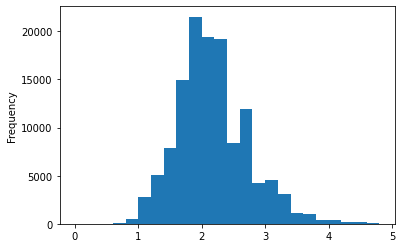

In [53]:
resolution_fig, ax_res_hist = plt.subplots(1,1)

res_bins = np.arange(0, 5, 0.2)

ax_res_hist.hist(df['resolution'].dropna(), 
             bins=res_bins)

#### Task 6

Plot a histogram for a numerical parameter from ```df``` of your chioce. Inspect the [Maplotlib documentation](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hist.html?highlight=hist#matplotlib.axes.Axes.hist) for this form of histogram. Add additional arguments into your code to format the graph's appearance. 

Axes labels can also be added using the method ```.set_nlabel```, replacing ```n``` with either ```x``` or ```y```. 

In [ ]:
# Enter code for Task 6 here


Scatter plots can be a good way to identify trends or groups within data. 

Run the code below. Is it valid to say the resolution of solved macromolecules has been worsening over time? What reasons are there for the trends observed? Discuss with your supervisor.

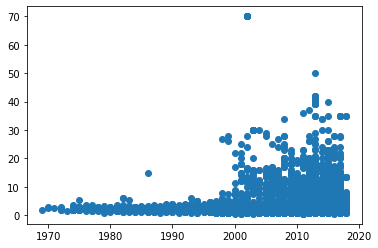

In [34]:
res_year_fig, res_year_ax = plt.subplots(1, 1)

year_resolution_df = df.dropna(subset=['resolution', 'publicationYear'])[['resolution', 'publicationYear']]

res_year_ax.scatter(year_resolution_df['publicationYear'], 
        year_resolution_df['resolution'])

#### Task 7

Repurpose the code above to plot resolution as a function of molecular weight. 

Refer to the [Matplotlib documentation](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.scatter.html?highlight=scatter#matplotlib.axes.Axes.scatter) for scatter plots and add some formatting to change the plot's appearance. 
______

The final plot we will look at is the bar plot, specifically a horizontal bar plot. Run the code below. Discuss the code with your supervisor if anything is unlcear. 

<BarContainer object of 33 artists>

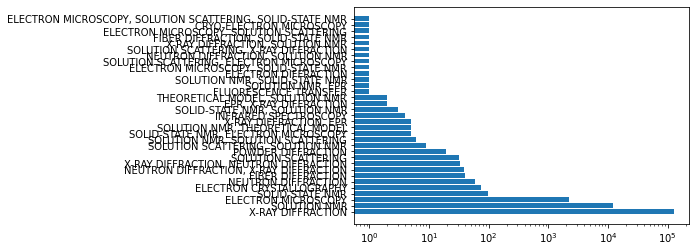

In [57]:
fig, ax = plt.subplots(1, 1)

ax.barh(y=df['experimentalTechnique'].value_counts().index, 
       width=df['experimentalTechnique'].value_counts(),
      log=True)

#### Task 8

What is the most commonly soled type of macromolecule?

<BarContainer object of 13 artists>

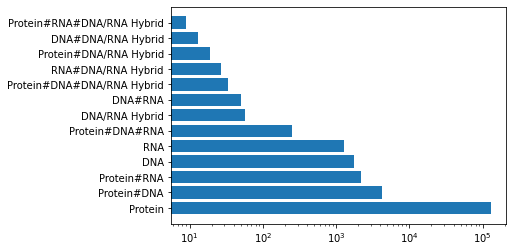

In [60]:
fig, ax = plt.subplots(1, 1)

ax.barh(y=df['macromoleculeType'].value_counts().index, 
       width=df['macromoleculeType'].value_counts(),
      log=True)